# Projeto 1 - Redes Temporais de Coautoria

As redes de coautoria em trabalhos científicos são um importante ferramenta indicativa de colaboração entre pesquisadores, refletindo tanto a integração acadêmica quanto o compartilhamento do conhecimento produzido entre diferentes instituições. Por meio delas, é possível observar como o desenvolvimento científico se articula de maneira coletiva, favorecendo a inovação, o aumento da produtividade científica e a disseminação de ideias. Assim, a análise das redes de coautoria permite identificar pesquisadores mais influentes, grupos de pesquisa com maior consolidação e possíveis lacunas de colaboração, servindo como ferramenta estratégica para o planejamento de políticas científicas e acadêmicas.

Neste projeto é feita uma análise das redes de coautoria no âmbito do Programa de Pós-Graduação em Engenharia Elétrica e de Computação da Universidade Federal do Rio Grande do Norte (PPGEEC/UFRN) desde o ano 2010 até o presente. Tal análise é relevante por permitir uma compreensão aprofundada da evolução da colaboração entre seus docentes, discentes e parceiros externos. Esse tipo de estudo possibilita identificar tendências de pesquisa, áreas com maior interação científica e o impacto da produção acadêmica do programa ao longo do tempo. Além disso, ao mapear essas redes, pode-se avaliar o alcance e a inserção do PPGEEC no cenário nacional e internacional, bem como subsidiar ações que promovam uma maior integração entre pesquisadores e fortaleçam a excelência acadêmica do programa.


## Importação de bibliotecas

In [1]:
import networkx as nx
from networkx.drawing.layout import spring_layout
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns
#from scipy import stats
!pip install joypy
import joypy



## Bases de dados anuais de 2010 até 2025

As redes de coautorias anuais são armazenadas em uma lista de grafos NetwokX.

In [2]:

G_anual = [] # Lista com todos os grafos anuais
G_anual.append(nx.read_gexf("/content/2010_authors_network.gexf"))
G_anual.append(nx.read_gexf("/content/2011_authors_network.gexf"))
G_anual.append(nx.read_gexf("/content/2012_authors_network.gexf"))
G_anual.append(nx.read_gexf("/content/2013_authors_network.gexf"))
G_anual.append(nx.read_gexf("/content/2014_authors_network.gexf"))
G_anual.append(nx.read_gexf("/content/2015_authors_network.gexf"))
G_anual.append(nx.read_gexf("/content/2016_authors_network.gexf"))
G_anual.append(nx.read_gexf("/content/2017_authors_network.gexf"))
G_anual.append(nx.read_gexf("/content/2018_authors_network.gexf"))
G_anual.append(nx.read_gexf("/content/2019_authors_network.gexf"))
G_anual.append(nx.read_gexf("/content/2020_authors_network.gexf"))
G_anual.append(nx.read_gexf("/content/2021_authors_network.gexf"))
G_anual.append(nx.read_gexf("/content/2022_authors_network.gexf"))
G_anual.append(nx.read_gexf("/content/2023_authors_network.gexf"))
G_anual.append(nx.read_gexf("/content/2024_authors_network.gexf"))
G_anual.append(nx.read_gexf("/content/2025_authors_network.gexf"))

## Bases de dados quadrienais

As redes de coautorias quadrienais também são armazenadas em uma lista de grafos NetwokX.

In [5]:
G_quad = [] # Lista com todos os grafos quadrienais
G_quad.append(nx.read_gexf("/content/2010-2012.gexf"))
G_quad.append(nx.read_gexf("/content/2013-2016.gexf"))
G_quad.append(nx.read_gexf("/content/2017-2020.gexf"))
G_quad.append(nx.read_gexf("/content/2021-2024.gexf"))

## Base de dados geral

Por fim, um grafo armazena os dados gerais de 2010 até 2025.

In [6]:
G_geral = nx.read_gexf("/content/2010-2025.gexf")

## Evolução ao longo dos anos

Inicialmente, analisamos como as redes de coautoria do PPGEEC evoluíram de 2010 até 2025 a partir de quatro métricas: densidade, quantidade de vértices, quantidade de arestas e quantidade média de vizinhos.

In [7]:
densidade = []         # Densidade
num_vertices = []      # Número de vértices
num_arestas = []       # Número de arestas
num_med_vizinhos = []  # Número médio de vizinhos

for G in G_anual:
  densidade.append(nx.density(G))
  num_vertices.append(G.number_of_nodes())
  num_arestas.append(G.number_of_edges())
  num_med_vizinhos.append(sum(dict(nx.average_neighbor_degree(G)).values()) / len(G))



A evolução dessas métricas é exibida no gráfico a seguir. Para que as métricas possam ter sua evolução comparadas umas às outras, seus valores foram normalizados entre 0 e 1.

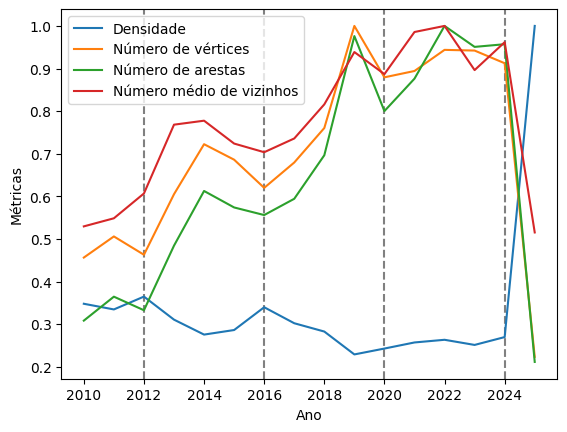

In [8]:
#Normalização dos valores das métricas
norm_densidade = [x / max(densidade) for x in densidade]
norm_num_vertices = [x / max(num_vertices) for x in num_vertices]
norm_num_arestas = [x / max(num_arestas) for x in num_arestas]
norm_num_med_vizinhos = [x / max(num_med_vizinhos) for x in num_med_vizinhos]

ano = range(2010, 2026)
anos_quadrienios = [2012, 2016, 2020, 2024]  # Anos para linhas verticais
for av in anos_quadrienios:
    plt.axvline(x=av, color='gray', linestyle='--')
plt.plot(ano, norm_densidade, label='Densidade')
plt.plot(ano, norm_num_vertices, label='Número de vértices')
plt.plot(ano, norm_num_arestas, label='Número de arestas')
plt.plot(ano, norm_num_med_vizinhos, label='Número médio de vizinhos')
plt.xlabel('Ano')
plt.ylabel('Métricas')
plt.legend()
plt.show()

Em seguida, é utilizado um gráfico de *ridgeline* (ou *joyplot*) para apresentar as distribuições de probabilidade dos números médios de vizinhos para cada uma das redes anuais de coautoria.

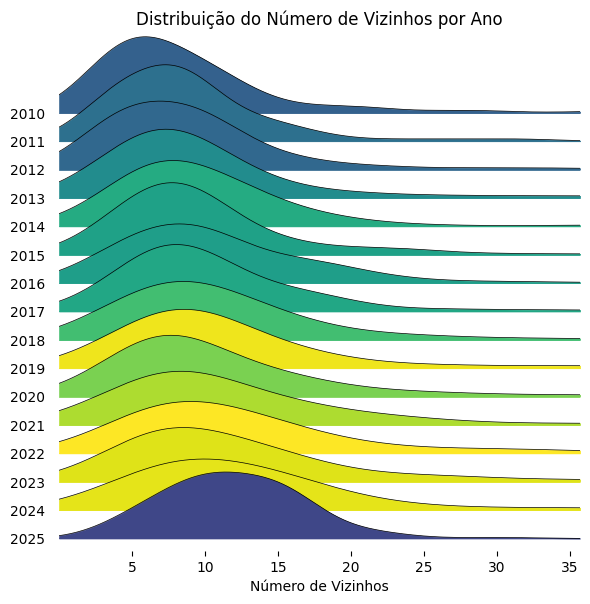

In [9]:
# Cria uma lista para armazenar os dados para o joyplot
data = []
for i, G in enumerate(G_anual):
  ano = 2010 + i
  num_vizinhos = list(dict(G.degree()).values()) # Obtém o número de vizinhos de cada nó no grafo
  for vizinhos in num_vizinhos:
      data.append([ano, vizinhos])

# Cria um DataFrame para o joyplot
df = pd.DataFrame(data, columns=['Ano', 'Num_Vizinhos'])

# Cria um dicionário mapeando anos em cores
#colors = cm.viridis(norm_num_arestas)
#year_colors = {year: color for year, color in zip(range(2010, 2026), colors)}

original_cmap = plt.cm.viridis
cmap = ListedColormap(original_cmap(norm_num_arestas))
sm = cm.ScalarMappable(cmap=original_cmap)
sm.set_array([])

# Cria o joyplot
fig, axes = joypy.joyplot(
    df,
    by='Ano',
    column='Num_Vizinhos',
    overlap=1,  # Ajusta a sobreposição das curvas
    colormap=cmap,
    figsize=(6,6),  # Ajusta o tamanho da figura
    title="Distribuição do Número de Vizinhos por Ano",  # Adiciona um título
    kind='kde',  # Usa KDE para estimar a densidade de probabilidade
    fill=True,  # Preenche a área sob a curva
    linecolor="k",  # Define a cor da linha como preto
    linewidth=0.5,  # Define a largura da linha
    #x_range=[0, max(df['Num_Vizinhos']) + 2]  # Define o intervalo do eixo x com base nos dados
    x_range=[0, df['Num_Vizinhos'].mean() + 2*df['Num_Vizinhos'].std()]  # Define o intervalo do eixo x com base nos dados
)


plt.xlabel("Número de Vizinhos")
plt.show()

## Evolução das redes de coautoria nos períodos quadrienais de avaliação

A seguir são analisadas as redes de coautoria nos períodos quadrienais de avaliação da Fundação Coordenação de Aperfeiçoamento de Pessoal de Nível Superior (CAPES). Os períodos analisados são: 2010-2012, 2013-2016, 2017-2020 e 2020-2024. Nas visualizações a seguir, a espessura das arestas é proporcional à quantidade de citações em artigos em que os dois pesquisadores são coautores. O tamanho dos vértices é proporcional ao número de coautores de cada pesquisador. os cinco pesquisadores com mais coautores são representados na cor verde, e os demais em azul. Arestas na cor vermelha indicam coautoria entre professores efetivos do PPGEEC.

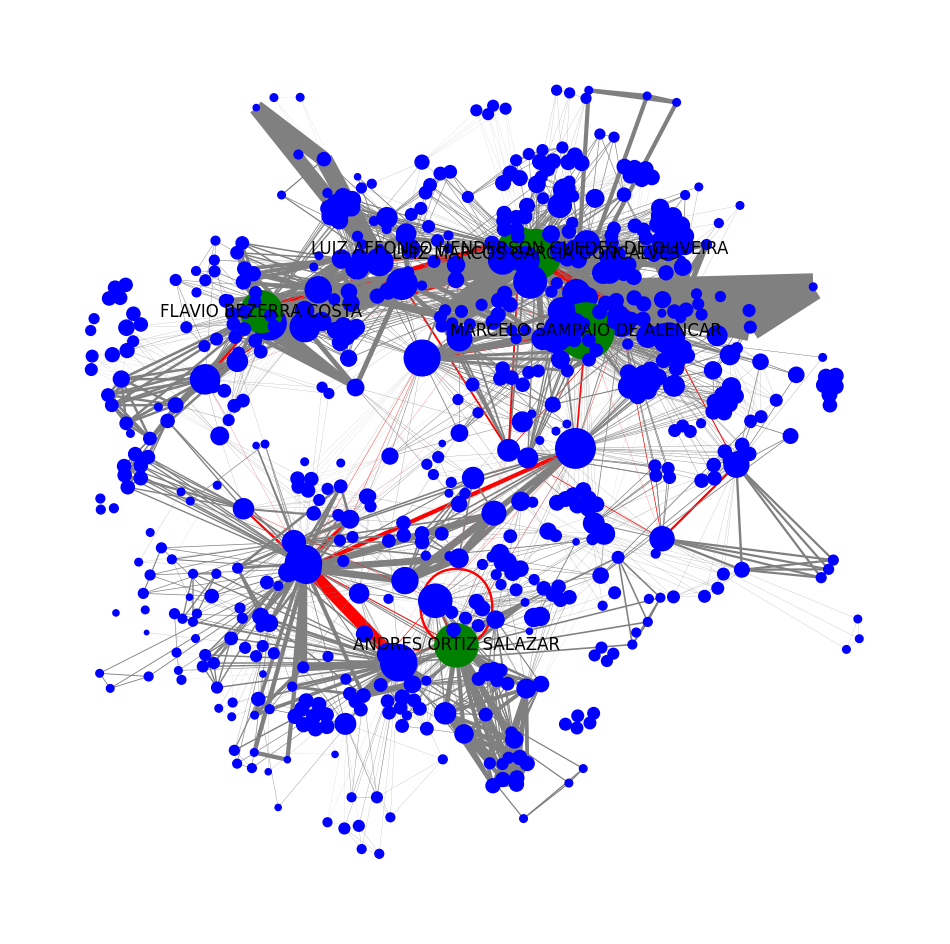

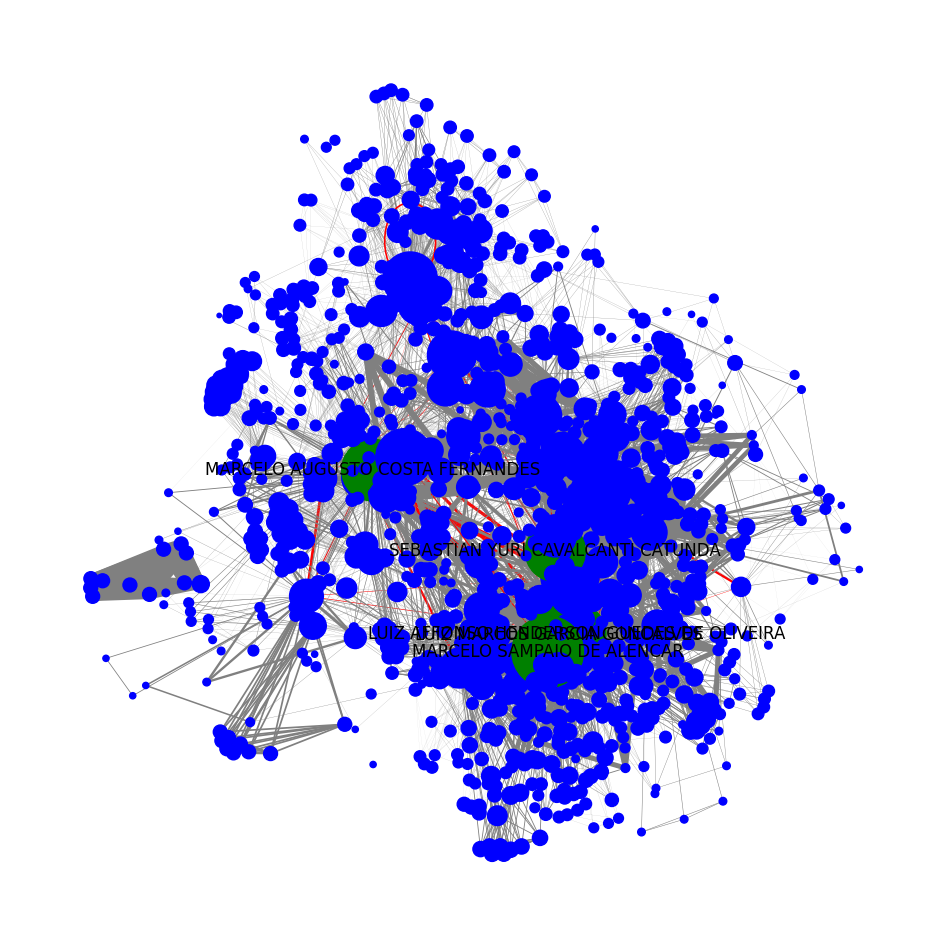

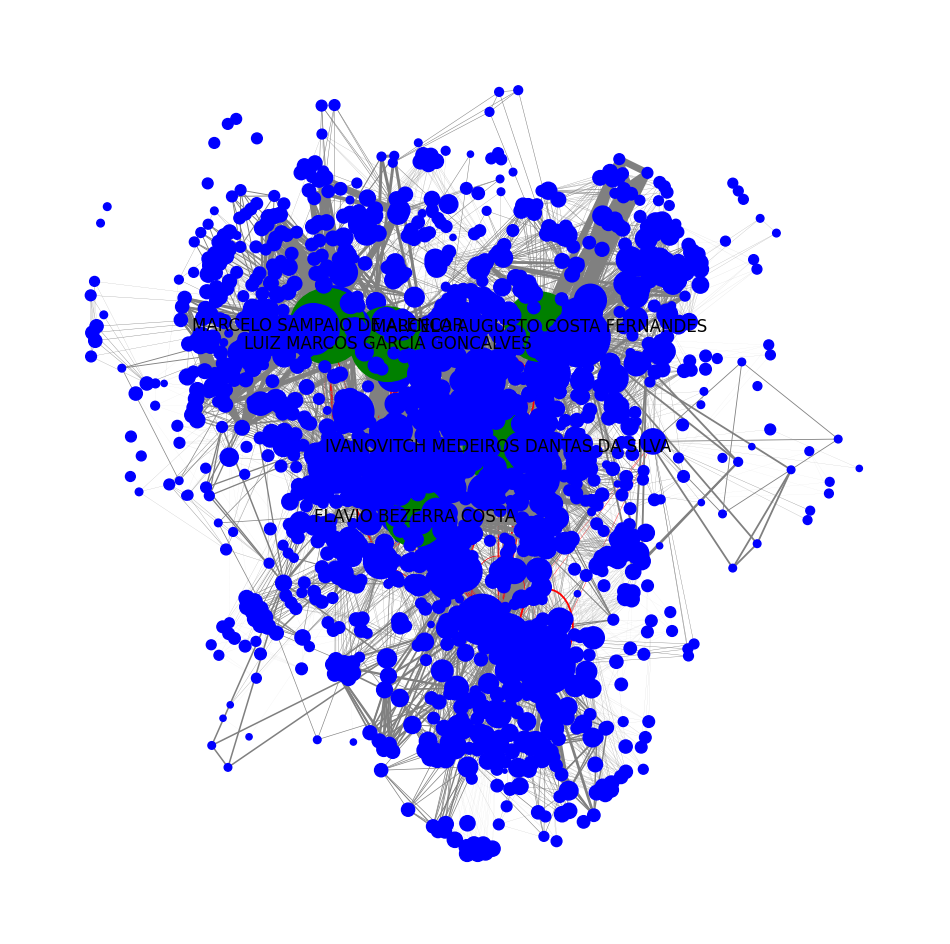

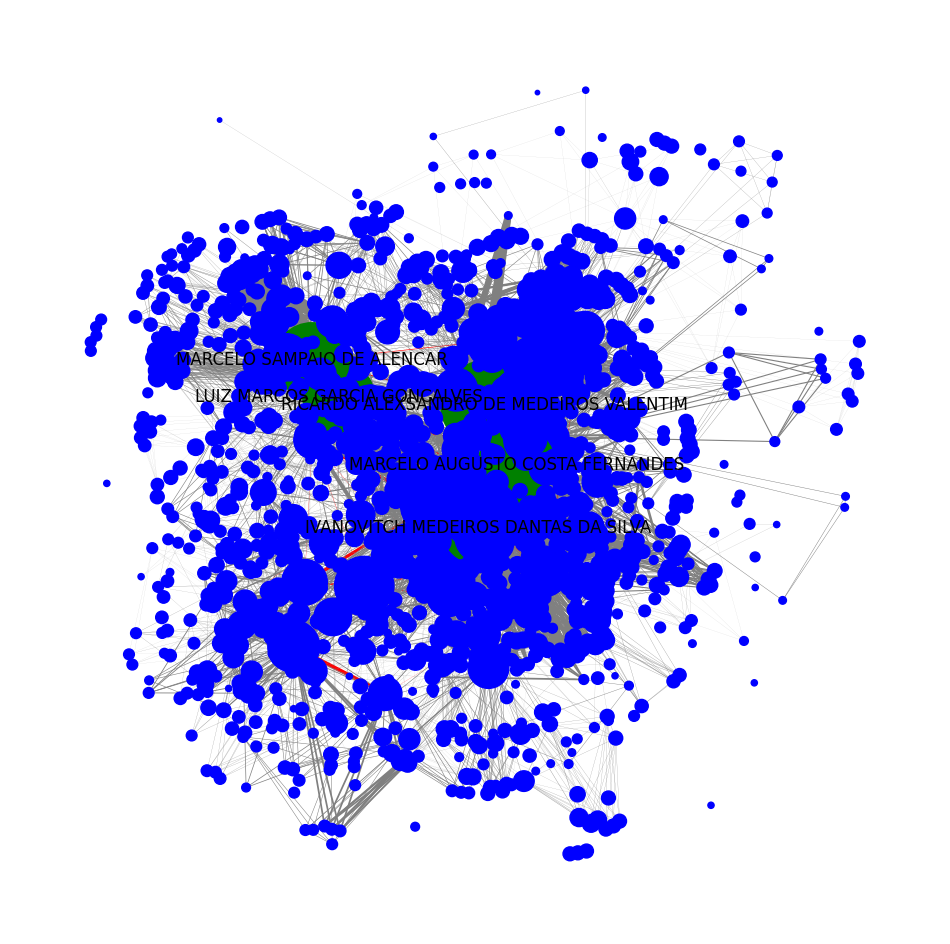

In [50]:
for G in G_quad:
    # Tamanho dos vértices de acordo com o grau
    tamanho_vertices = [10 * v for v in dict(G.degree()).values()]

    # Coloração e rótulo dos vértices
    node_degrees = dict(G.degree())  # Número de vizinhos de cada vértice
    top_five_nodes = sorted(node_degrees, key=node_degrees.get, reverse=True)[:5]  # Cinco vértices de maior grau
    node_colors = []
    labels = {}
    new_labels = {node: attributes['complete_name'] for node, attributes in G.nodes(data=True) if node in top_five_nodes}
    for node in G.nodes():
        if node in top_five_nodes:
            node_colors.append('green')  # Cor dos cinco principais vértices
            labels[node] = node  # Rótulo dos cinco principais vértices
        else:
            node_colors.append('blue')  # Cor dos demais

    # Pinta de vermelho as arestas entre professores permanentes do PPGEEC
    red_edges = []
    for u, v, attributes in G.edges(data=True):
        # Checa se o atributo 'is_permanent' existe antes de tentar acessá-lo
        is_permanent_u = G.nodes[u].get('is_permanent', False)  # False se inexistente
        is_permanent_v = G.nodes[v].get('is_permanent', False)  # False se inexistente
        if is_permanent_u and is_permanent_v:
            red_edges.append((u, v))
    edge_colors = ['red' if edge in red_edges else 'grey' for edge in G.edges()]

    # Modifica a largura das arestas
    edge_widths = []
    for u, v, attributes in G.edges(data=True):
        citation_num = attributes.get('citation_num', 1)  # Recupera o número de citações. Vale 1 se inexistente.
        edge_widths.append(citation_num)
    max_width = max(edge_widths)
    if max_width > 0:  # Evita divisão por zero
        edge_widths = [w / max_width * 20 for w in edge_widths]  # Escala entre 0 e 20

    # Visualização do grafo
    pos = spring_layout(G, k=0.18)  # Layout para impedir sobreposição de vértices
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    nx.draw(G,
            pos=pos,
            with_labels=True,
            labels=new_labels,
            node_color=node_colors,
            node_size=tamanho_vertices,
            width=edge_widths,
            font_color='black',
            font_size=12,
            edge_color=edge_colors,
            ax=ax
            )
    plt.show()

In [52]:
def graph_visualization(G):
    # Tamanho dos vértices de acordo com o grau
    tamanho_vertices = [10 * v for v in dict(G.degree()).values()]

    # Coloração e rótulo dos vértices
    node_degrees = dict(G.degree())  # Número de vizinhos de cada vértice
    top_five_nodes = sorted(node_degrees, key=node_degrees.get, reverse=True)[:5]  # Cinco vértices de maior grau
    node_colors = []
    labels = {}
    new_labels = {node: attributes['complete_name'] for node, attributes in G.nodes(data=True) if node in top_five_nodes}
    for node in G.nodes():
        if node in top_five_nodes:
            node_colors.append('green')  # Cor dos cinco principais vértices
            labels[node] = node  # Rótulo dos cinco principais vértices
        else:
            node_colors.append('blue')  # Cor dos demais

    # Pinta de vermelho as arestas entre professores permanentes do PPGEEC
    red_edges = []
    for u, v, attributes in G.edges(data=True):
        # Checa se o atributo 'is_permanent' existe antes de tentar acessá-lo
        is_permanent_u = G.nodes[u].get('is_permanent', False)  # False se inexistente
        is_permanent_v = G.nodes[v].get('is_permanent', False)  # False se inexistente
        if is_permanent_u and is_permanent_v:
            red_edges.append((u, v))
    edge_colors = ['red' if edge in red_edges else 'grey' for edge in G.edges()]

    # Modifica a largura das arestas
    edge_widths = []
    for u, v, attributes in G.edges(data=True):
        citation_num = attributes.get('citation_num', 1)  # Recupera o número de citações. Vale 1 se inexistente.
        edge_widths.append(citation_num)
    max_width = max(edge_widths)
    if max_width > 0:  # Evita divisão por zero
        edge_widths = [w / max_width * 20 for w in edge_widths]  # Escala entre 0 e 20

    # Visualização do grafo
    pos = spring_layout(G, k=0.18)  # Layout para impedir sobreposição de vértices
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    nx.draw(G,
            pos=pos,
            with_labels=True,
            labels=new_labels,
            node_color=node_colors,
            node_size=tamanho_vertices,
            width=edge_widths,
            font_color='black',
            font_size=12,
            edge_color=edge_colors,
            ax=ax
            )
    plt.show()

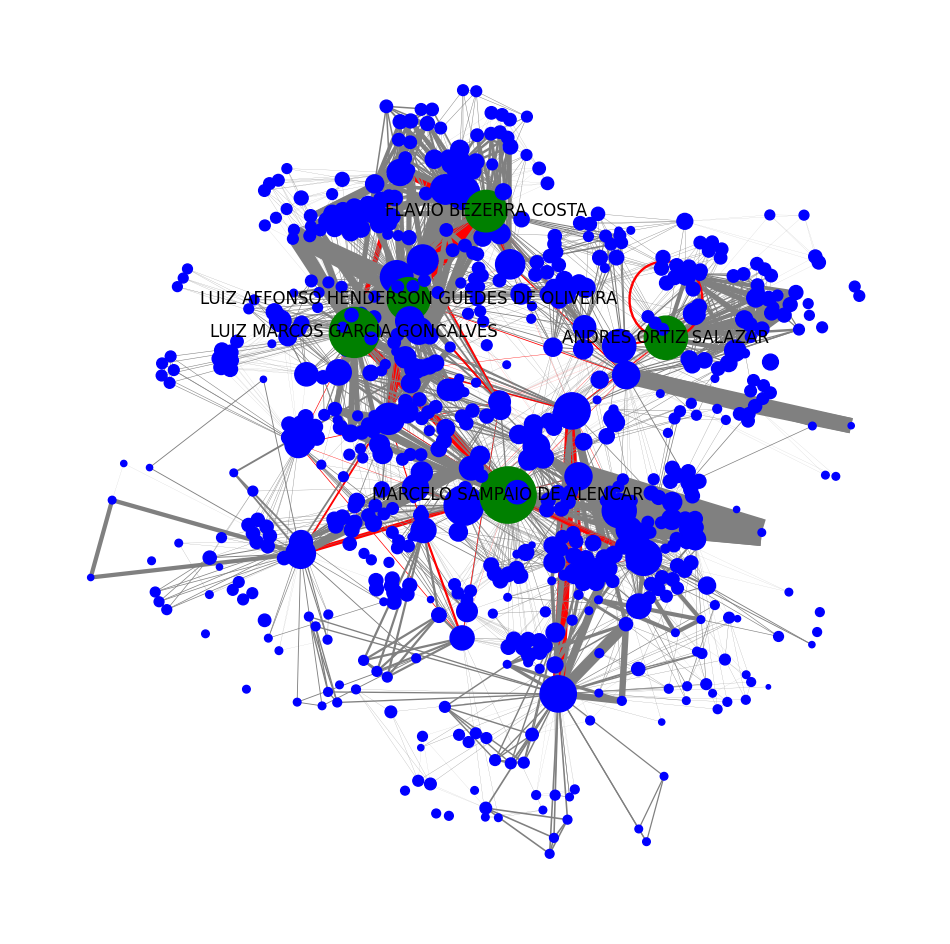

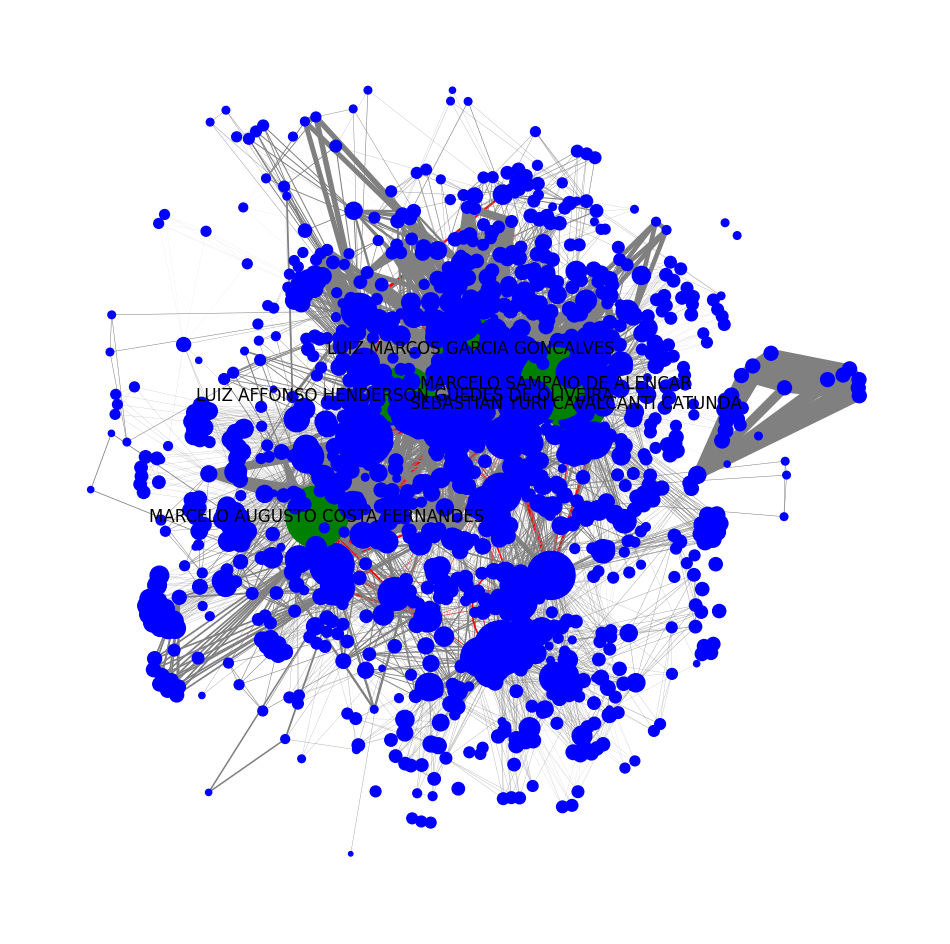

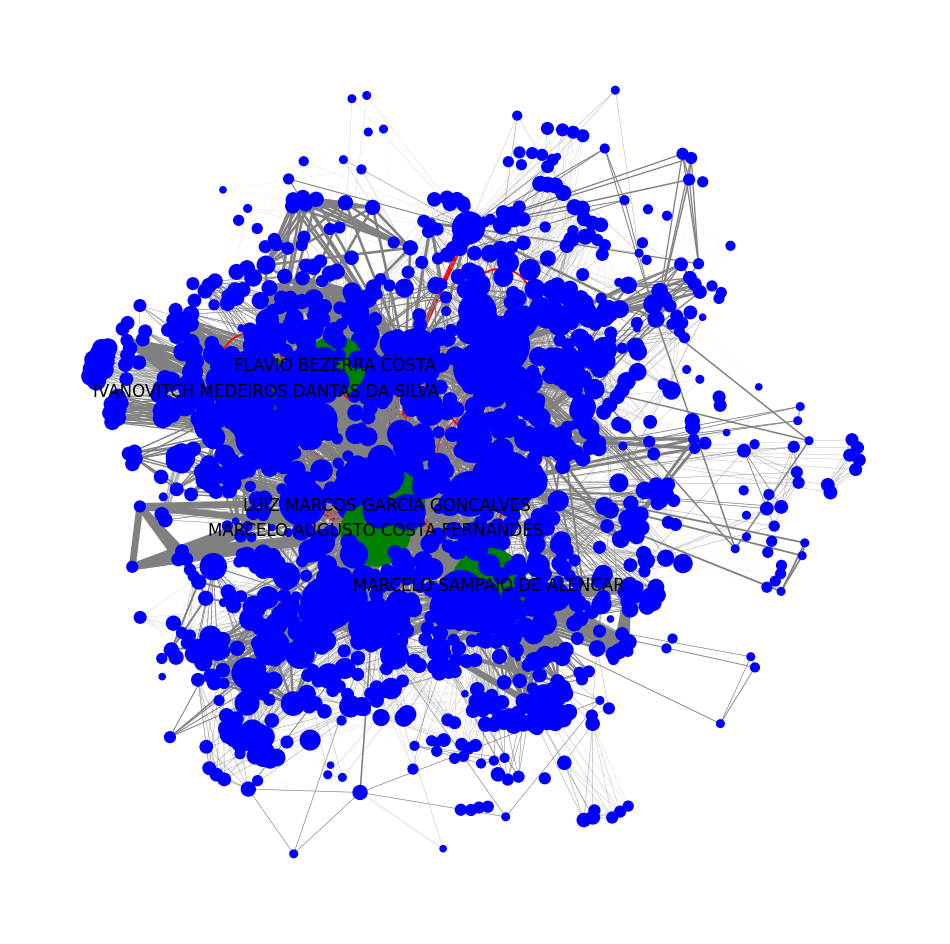

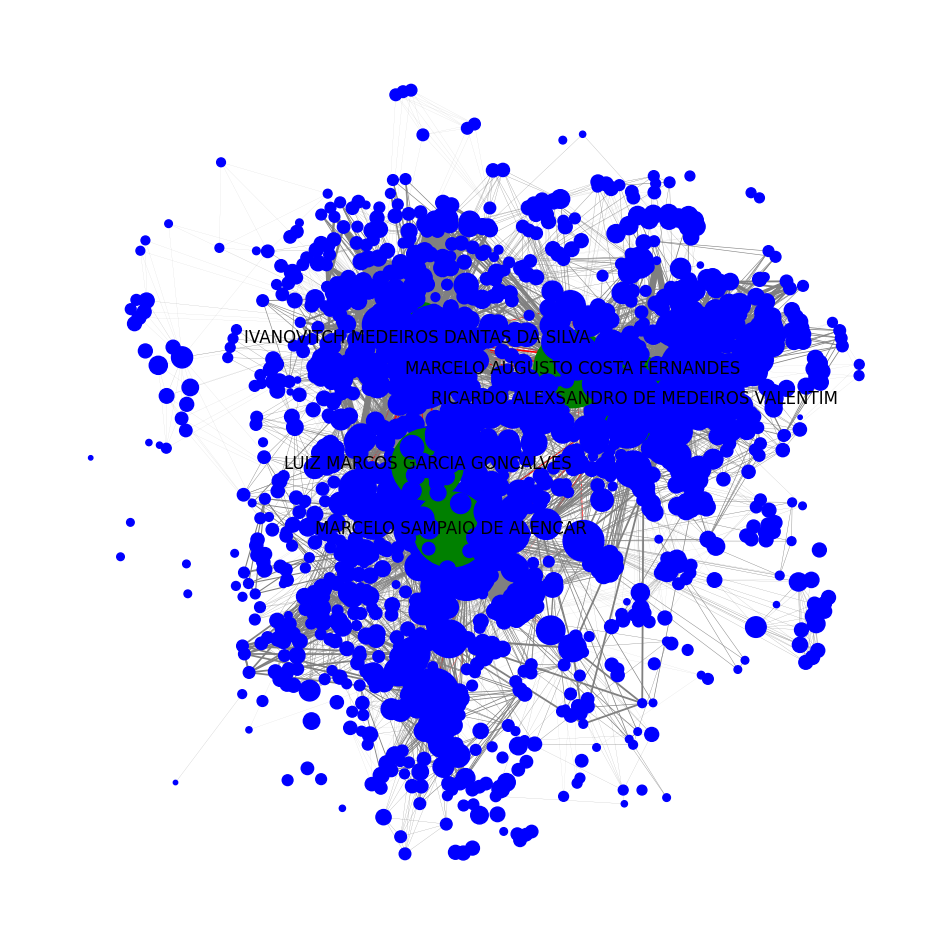

In [53]:
for G in G_quad:
    graph_visualization(G)

## Rede geral

Por fim, é analisada a rede de coautoria do PPGEEC compreendendo todo o período que vai do ano 2010 até o corrente ano (2025).

Densidade do grafo geral: 0.008676


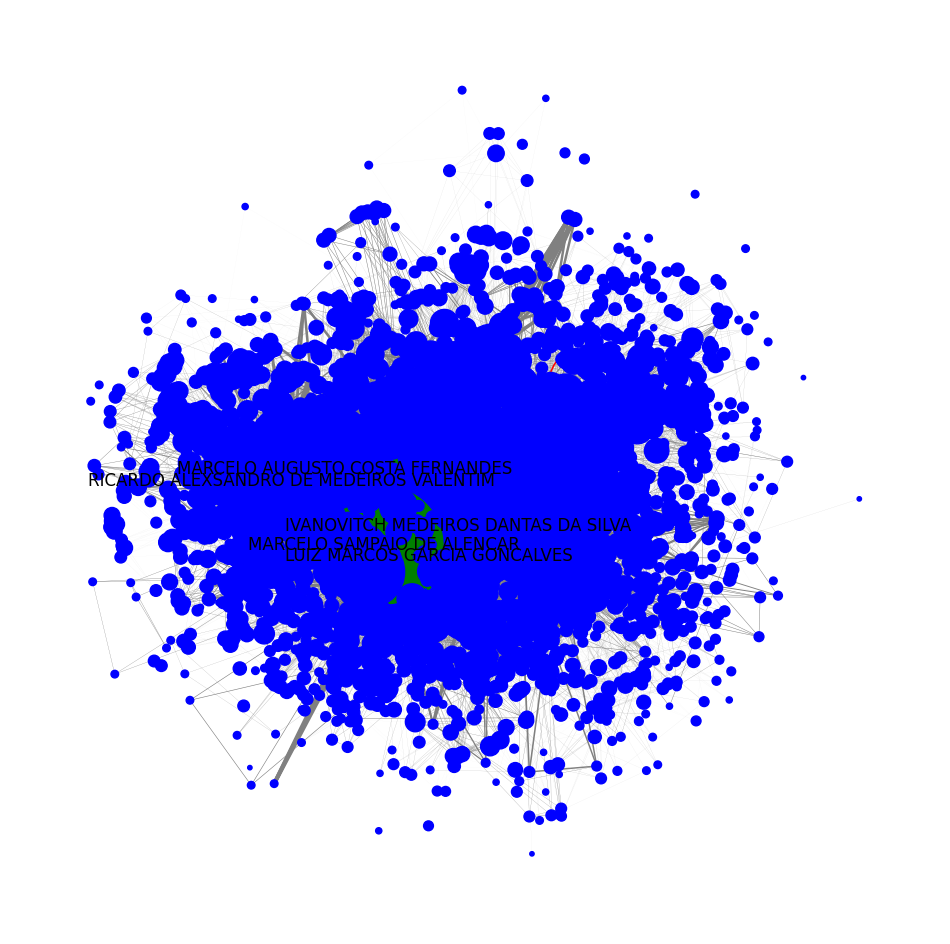

In [66]:
graus = dict(G_geral.degree()).values()
media = np.mean(list(graus))                                  # Média no número de vizinhos
desvio_padrao = np.std(list(graus))                           # Desvio-padrão no número de vizinhos
print(f"Densidade do grafo geral: {nx.density(G_geral):.6f}") # Densidade
graph_visualization(G_geral)

A seguir é gerado um subgrafo contendo apenas os nós que possuem número de vizinhos igual ou maior que um desvio-padrão acima da média.

Densidade do subgrafo: 0.228561


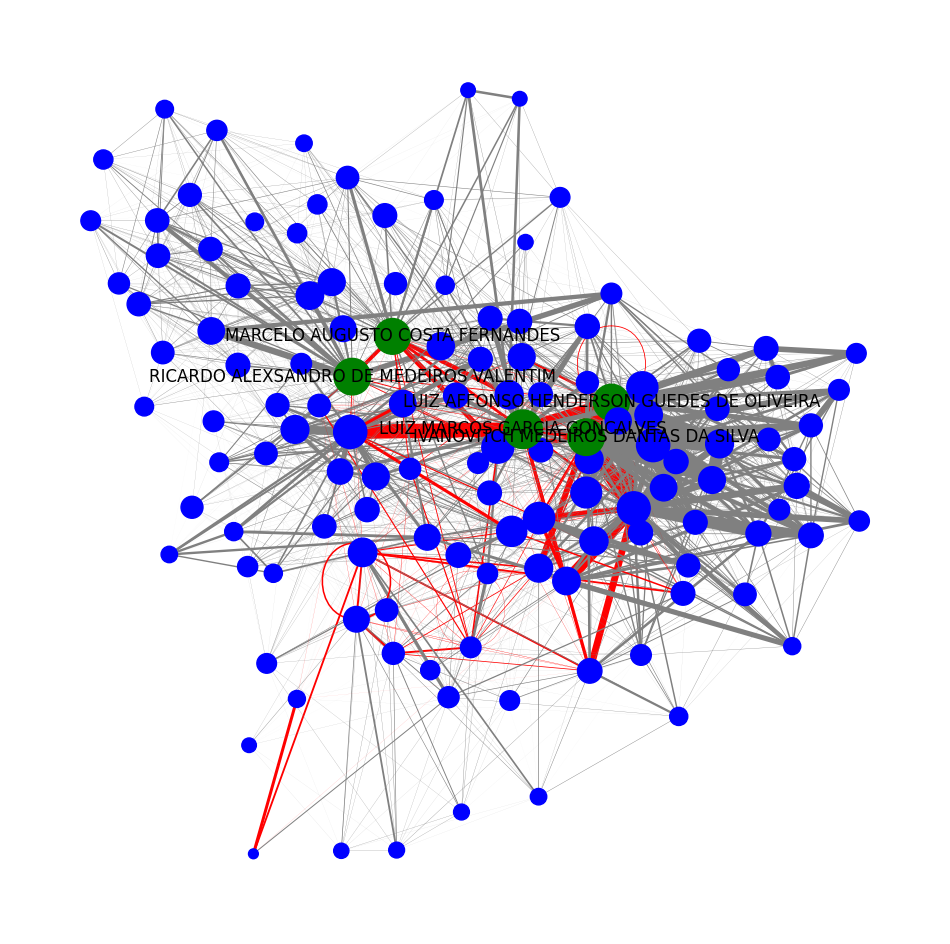

In [65]:
# Geração do subgrafo
limite = media + desvio_padrao
nos_selecionados = [no for no, grau in G_geral.degree() if grau >= limite]
subgrafo = G_geral.subgraph(nos_selecionados)
print(f"Densidade do subgrafo: {nx.density(subgrafo):.6f}")
graph_visualization(subgrafo)

Por fim, analisaremos a rede ego do nó do nó de maior grau na rede. Esse nó corresponde ao professor Ricardo Valentim do Departamento de Engenharia de Computação e Automação da UFRN (DCA-UFRN). Será analisada a sua rede ego no grafo geral e também no subgrafo gerado anteriormente.

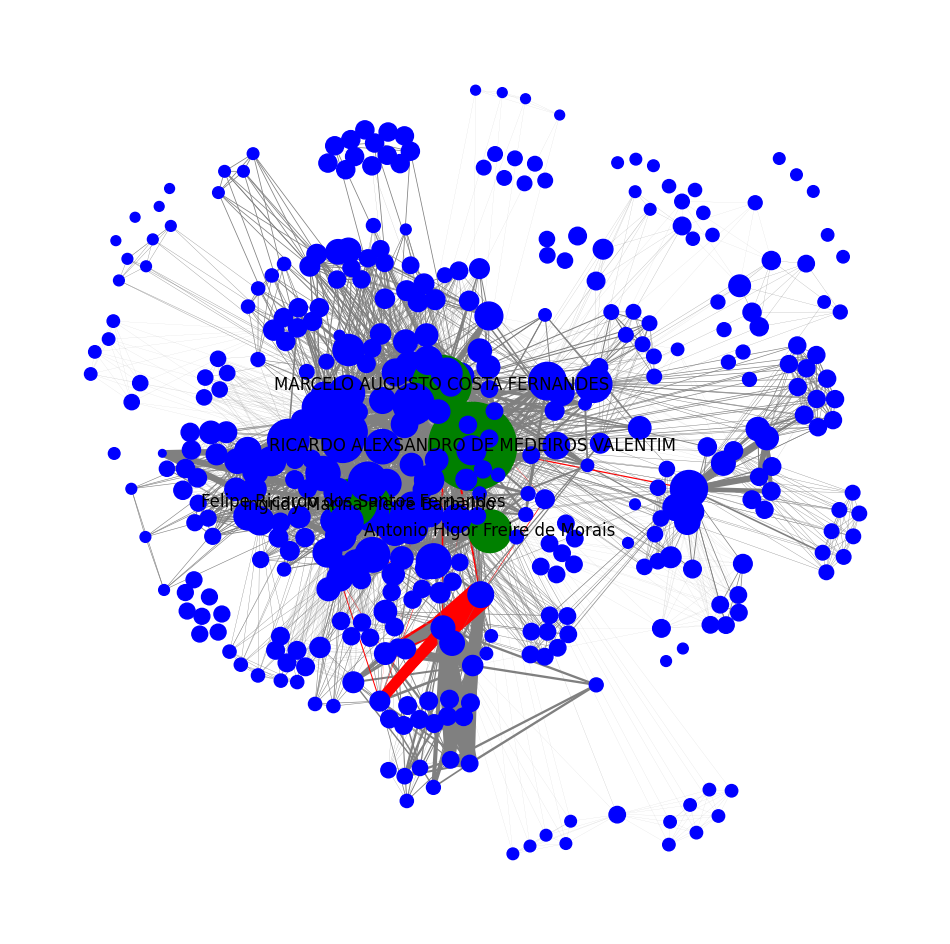

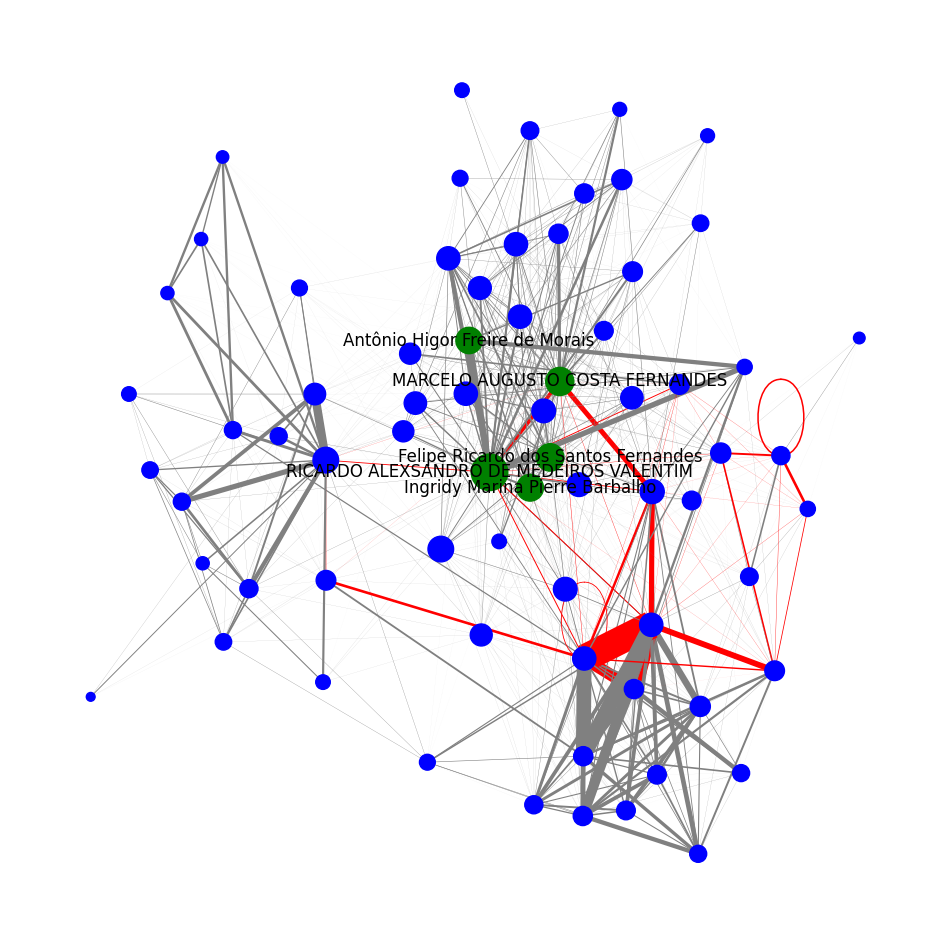

In [57]:
# Encontrando o vértice com maior grau (maior número de vizinhos)
max_node = max(G.degree, key=lambda x: x[1])
max_node_name = G_geral.nodes[max_node[0]]['complete_name']
print(f"O vértice com mais vizinhos é '{max_node_name}' com grau {max_node[1]}")

# Obtendo a rede ego do nó de maio grau
ego_net = nx.ego_graph(G, max_node[0])
graph_visualization(ego_net)

# Obtendo a rede ego desse mesmo nó no subgrafo
ego_subnet = nx.ego_graph(subgrafo, max_node[0])
graph_visualization(ego_subnet)

*Na elaboração dos textos que dão suporte às análises técnicas apresentadas neste documento, fez-se uso das ferramentas ChatGPT, da OpenAI, e Gemini, da Google. Todo o texto foi revisado minuciosamente pelo autor para garantir precisão e adequação ao contexto.*